In [6]:
%matplotlib inline

from movielens import MovieLens
from linUCB_movie import LinUCB
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ucb = LinUCB(alpha=0.1, dataset=None, max_items=100, allow_selecting_known_arms=True)

Successfully downloaded ml-100k.zip from http://files.grouplens.org/datasets/movielens/ml-100k.zip
Extracting ml-100k.zip
Successfully extracted ml-100k.zip
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Positive ratings (>=4) turned to 1, negative to -1, unknown to 0
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    55375
Known negative ratings:    44625
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.034912106604393346
Ratio of negative ratings: 0.028134587037851974
Avg number of positive ratings per user: 58.72216330858961 +- 54.67211827074995
Avg number of negative ratings per user: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (94

In [18]:
ucb.dataset.get_features_of_current_arms(t=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [19]:
dataarray.shape

(41, 40)

In [6]:
import pickle

dataarray = pickle.load(open('dataarray.pkl','rb'))

In [25]:
# replace ubc dataset
ucb.dataset.R=dataarray
ucb.dataset.num_users=41
ucb.dataset.arm_feature_dim=40
ucb.dataset.num_items=40

In [26]:
print('R:\n', ucb.dataset.R)

R:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [27]:
avg_reward = ucb.run(num_epochs=50)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Text(0.5, 1.0, 'LinUCB: Fixed rewards')

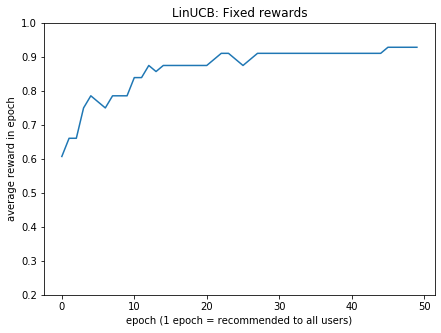

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Fixed rewards')

In [6]:
ucb_stochastic = LinUCB(alpha=0.1, dataset=None, max_items=100, 
                        allow_selecting_known_arms=True, fixed_rewards=False, prob_reward_p=0.9)

data\movielens\ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Positive ratings (>=4) turned to 1, negative to -1, unknown to 0
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    55375
Known negative ratings:    44625
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.034912106604393346
Ratio of negative ratings: 0.028134587037851974
Avg number of positive ratings per user: 58.72216330858961 +- 54.67211827074995
Avg number of negative ratings per user: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
Number of users:           56
Number of items:           100
Total

In [7]:
print('R:\n', ucb_stochastic.dataset.R)

R:
 [[ 1. -1.  1. ...,  1. -1.  1.]
 [ 1.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]]


In [8]:
avg_reward_stochastic = ucb_stochastic.run(num_epochs=50)

Finished epoch 0/50 with avg reward 0.42857142857142855 in 1.423952579498291s
Finished epoch 1/50 with avg reward 0.5535714285714286 in 1.4462800025939941s
Finished epoch 2/50 with avg reward 0.5178571428571429 in 1.4531726837158203s
Finished epoch 3/50 with avg reward 0.6428571428571429 in 1.4564926624298096s
Finished epoch 4/50 with avg reward 0.6785714285714286 in 1.4292511940002441s
Finished epoch 5/50 with avg reward 0.6785714285714286 in 1.4329595565795898s
Finished epoch 6/50 with avg reward 0.6071428571428571 in 1.5166280269622803s
Finished epoch 7/50 with avg reward 0.7142857142857143 in 1.5158579349517822s
Finished epoch 8/50 with avg reward 0.7321428571428571 in 1.5242359638214111s
Finished epoch 9/50 with avg reward 0.6785714285714286 in 1.4195635318756104s
Finished epoch 10/50 with avg reward 0.75 in 1.423771858215332s
Finished epoch 11/50 with avg reward 0.8035714285714286 in 1.5463316440582275s
Finished epoch 12/50 with avg reward 0.8035714285714286 in 1.5004987716674805

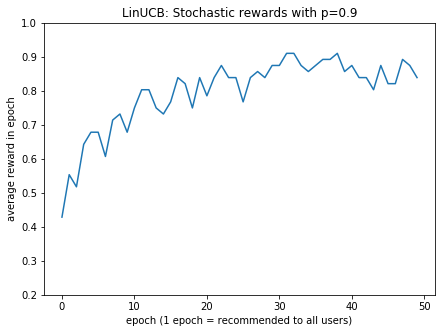

In [29]:
plt.plot(range(len(avg_reward_stochastic)), avg_reward_stochastic)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Stochastic rewards with p=0.9')

In [22]:
ucb.dataset.get_features_of_current_arms(t=0).shape

(100, 119)